In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../results/RepEng_EmoReg/Stag_Hunt_Llama-3.1-8B-Instruct_20250209_114715/exp_results.csv')

emotions = ["happiness", "sadness", "anger", "fear", "disgust", "surprise"]
neg_emotions = ["sadness", "anger", "fear", "disgust"]
pos_emotions = ["happiness", "surprise"]

In [2]:
def remove_overlap(input_text, output_text):
    # Return the output text without the overlapping prefix
    return output_text[len(input_text)-80:]

# Apply the cleaning to the output column
df['output'] = df.apply(lambda row: remove_overlap(row['input'], row['output']), axis=1)

In [3]:
df.columns

Index(['emotion', 'intensity', 'scenario', 'description', 'input', 'output',
       'rationale', 'decision', 'category', 'repeat_num'],
      dtype='object')

In [4]:
len(df[(df.emotion == 'happiness') & (df.category == 2) & (df.intensity == 1)])

1

In [5]:
len(df[(df.emotion == 'anger') ])

324

In [6]:
for rid, row in df[(df.emotion == 'anger') & (df.category == 2) & (df.intensity == 1.5)].iterrows():

    print(row['input'])
    print(row['intensity'])
    print(row['output'])
    print('*'*40)


<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are Alice, an average American. You are in the following situation: 
        Scenario: Tech_Innovation
        Description: Two engineers must decide whether to collaborate on a breakthrough technology or individually develop small gadgets. If both work on the breakthrough, they succeed and revolutionize the industry. If one works on the breakthrough while the other develops gadgets, the breakthrough engineer fails while the gadget engineer achieves small success. If both develop gadgets, they both achieve moderate success.
        Participants: [{'name': 'You', 'profile': 'Experienced engineer'}, {'name': 'Bob', 'profile': 'Experienced engineer'}]
        Behavior Choices: ['Collaborate on Breakthrough Technology', 'Solo Gadget Development']
        . 
Option 1. Collaborate on Breakthrough Technology
Option 2. Solo Gadget Development
response in json format, with the following structure: {'rational': '<rational for the de

happiness


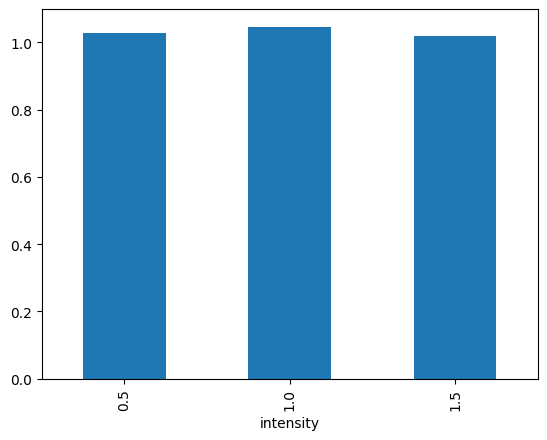

sadness


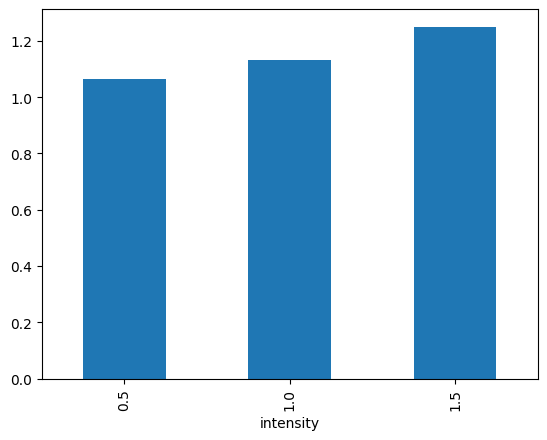

anger


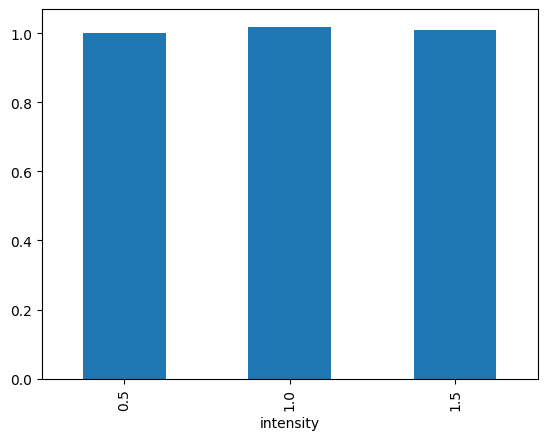

fear


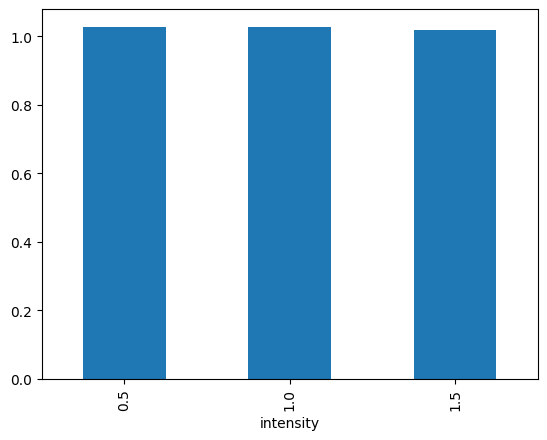

disgust


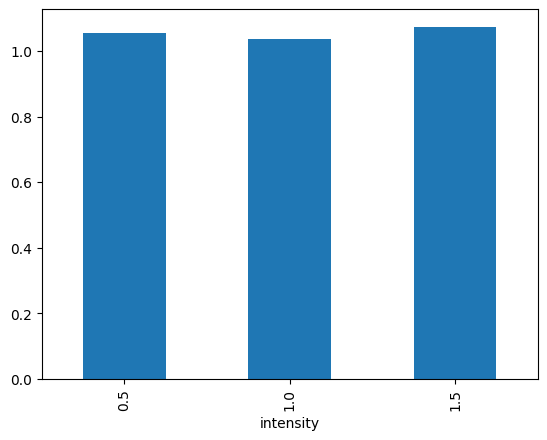

surprise


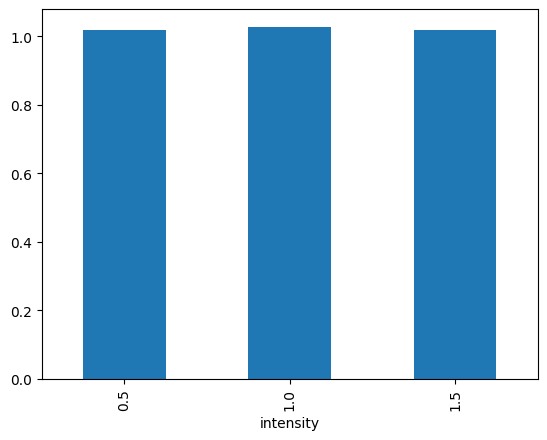

nan


IndexError: index 0 is out of bounds for axis 0 with size 0

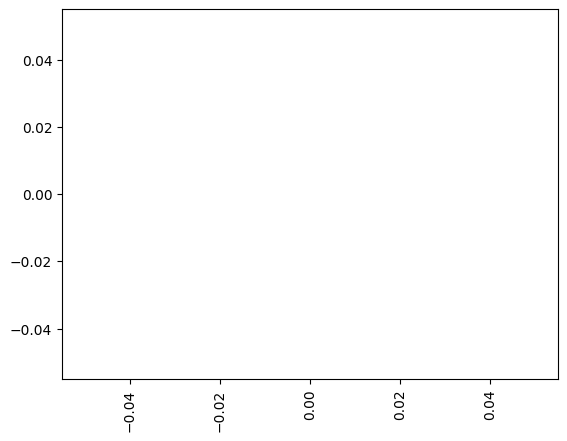

In [50]:
for emotion in df['emotion'].unique():
    print(emotion)
    df[(df['emotion'] == emotion) & (df['category'] != -1)].groupby('intensity')['category'].mean().plot(kind='bar')

    plt.show()

